In [24]:
import cv2 

In [25]:
def imshow(image, cmap=None):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb, cmap)
  plt.axis('off')  # Hide axis for better visualization
  plt.show()

/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear
Workflow Untitled run successfully in 19.975454 ms.


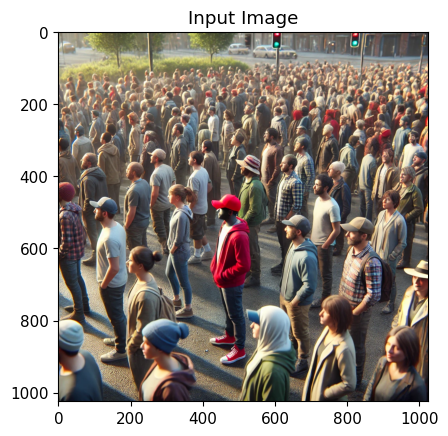

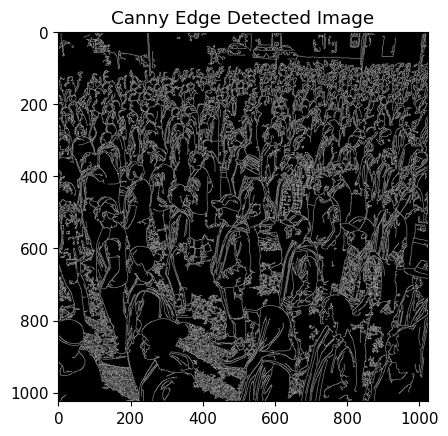

In [4]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
import os
import matplotlib.pyplot as plt
%matplotlib inline



# Init your workflow
wf = Workflow()

# Add the Canny Edge Detector
canny = wf.add_task(name="ocv_canny", auto_connect=True)

# Print current directory
print(os.getcwd())

# Run on your image    
# wf.run_on(path="path/to/your/image.png")
wf.run_on(path="_test_data/test1.jpg")

# After running the workflow, use matplotlib to display images

# Display the input image
input_image = canny.get_input(0).get_image()
plt.imshow(input_image, cmap="gray")
plt.title("Input Image")
plt.show()

# Display the output (edge-detected) image

output_image = canny.get_output(0).get_image()
plt.imshow(output_image, cmap="gray")
plt.title("Canny Edge Detected Image")
plt.show()

In [32]:
wf = Workflow()    

# Add the YOLO v7 Object Detector
yolov7 = wf.add_task(name="infer_yolo_v7", auto_connect=True)

# Run on your image  
# wf.run_on(path="path/to/your/image.png")
wf.run_on(path="_test_data/test1.jpg")

Will run on cuda
Fusing layers... 
Workflow Untitled run successfully in 186.911465 ms.


/users/eleves-b/2022/mathias.perez/Ikomia/Plugins/Python/infer_yolo_v7/yolov7/utils/torch_utils.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(weigh

In [33]:
print(yolov7)

###################################
#	Task: infer_yolo_v7
###################################
-----------------------------------
-	 PARAMETERS
-----------------------------------
cuda:True
iou_thres:0.5
conf_thres:0.25
model_weight_file:
model_name:yolov7
input_size:640
use_custom_model:False

-----------------------------------
-	 INPUTS
-----------------------------------
CImageIO(IODataType.IMAGE, CImageIO, _test_data/test1.jpg)
CGraphicsInput(CGraphicsInput)

-----------------------------------
-	 OUTPUTS
-----------------------------------
CImageIO(IODataType.IMAGE, CImageIO, _test_data/test1.jpg)
CObjectDetectionIO()

-----------------------------------
-	 INFORMATION
-----------------------------------
Running time: 186.911
Output folder: /users/eleves-b/2022/mathias.perez/Ikomia/Workflows/Untitled/2024-10-24T17-20-48/infer_yolo_v7/
###################################



In [46]:
# Get Object Detection results
results = yolov7.get_results()
print("yolov7 type : ", type(yolov7))
print("results type : ", type(results))

print(results.to_json())

# Iterate over detected objects
for obj in results.get_objects():
    print(obj)
    print(type(obj))
    # bbox as [x, y, w, h] (float values)
    bbox = obj.box
    # obj label as str
    label = obj.label
    # obj confidence as float
    confidence = obj.confidence

# Inspect your result
display(yolov7.get_image_with_graphics())

yolov7 type :  <class 'infer_yolo_v7.infer_yolo_v7_process.InferYoloV7'>
results type :  <class 'ikomia.dataprocess.pydataprocess.CObjectDetectionIO'>
{"detections":[{"box":{"height":264,"width":161,"x":498,"y":759},"color":{"a":195,"b":253,"g":11,"r":70},"confidence":0.9169921875,"id":0,"label":"person"},{"box":{"height":294,"width":156,"x":672,"y":729},"color":{"a":51,"b":253,"g":11,"r":70},"confidence":0.9052734375,"id":1,"label":"person"},{"box":{"height":226,"width":126,"x":0,"y":797},"color":{"a":194,"b":253,"g":11,"r":70},"confidence":0.8974609375,"id":2,"label":"person"},{"box":{"height":474,"width":119,"x":416,"y":451},"color":{"a":51,"b":253,"g":11,"r":70},"confidence":0.89697265625,"id":3,"label":"person"},{"box":{"height":452,"width":111,"x":611,"y":506},"color":{"a":195,"b":253,"g":11,"r":70},"confidence":0.88427734375,"id":4,"label":"person"},{"box":{"height":227,"width":162,"x":222,"y":796},"color":{"a":38,"b":253,"g":11,"r":70},"confidence":0.87353515625,"id":5,"label":

In [31]:
print(yolov7.get_output(0))

-----------------------------------
-	I/O: CImageIO
-----------------------------------
Description: 2D or 3D images.
Can be single frame from video or camera stream.
Save folder: 
Auto-save: 0
Data type: image
Save format: .png
Dimension count: 2
Displayable: 1
Composite: 0
Data available: 1
File name: _test_data/test1.jpg

